<a href="https://colab.research.google.com/github/PradeepKumarDataAnalyst/Heart-attack-risk-prediction/blob/main/Heart_attack_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_excel('data.xlsx')

In [108]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [109]:
pd.__version__

'1.3.5'

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [112]:
df.shape

(303, 14)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [114]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [115]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [116]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [117]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [118]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [119]:
round( ( df.isnull().sum() / df.shape[0] ) * 100 , 2)    # Display in percentage

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

**If there are duplicate rows in the data, we delete them**

In [120]:
df.shape

(303, 14)

In [121]:
df.drop_duplicates()
df.shape

(303, 14)

# Data wrangling/cleaning and exploratory data analysis



In [122]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

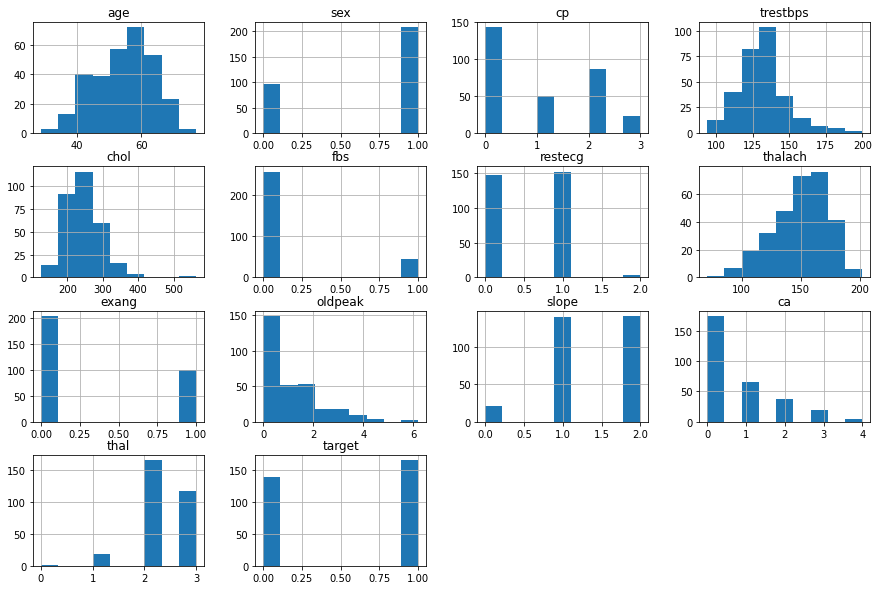

In [123]:
df.hist(figsize=(15,10), bins=9);

In [124]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [125]:
target_counts = df.target.value_counts()
print('Class 0  : ' , target_counts[0])
print('Class 1  : ' , target_counts[1])

Class 0  :  138
Class 1  :  165


In [126]:
total =  target_counts[0] +  target_counts[1]
print( "Percentage of Class 0 = " ,  round ( target_counts[0] / total  * 100 , 2 ) , "%" )
print( "Percentage of Class 1 = " ,  round ( target_counts[1] / total  * 100 , 2 ) , "%")

Percentage of Class 0 =  45.54 %
Percentage of Class 1 =  54.46 %


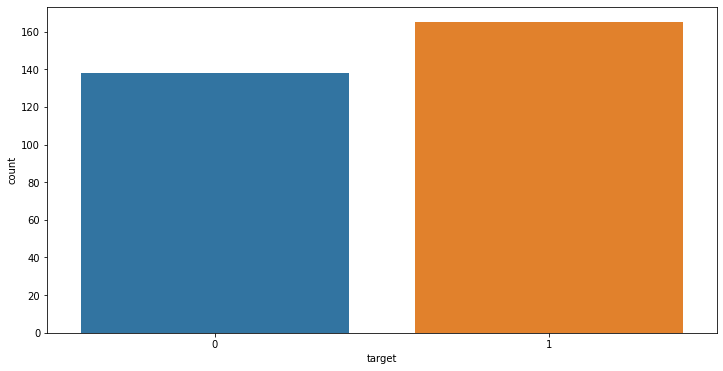

In [127]:
plt.figure(figsize=(12 , 6))
sns.countplot('target' , data = df);

In [128]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [129]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


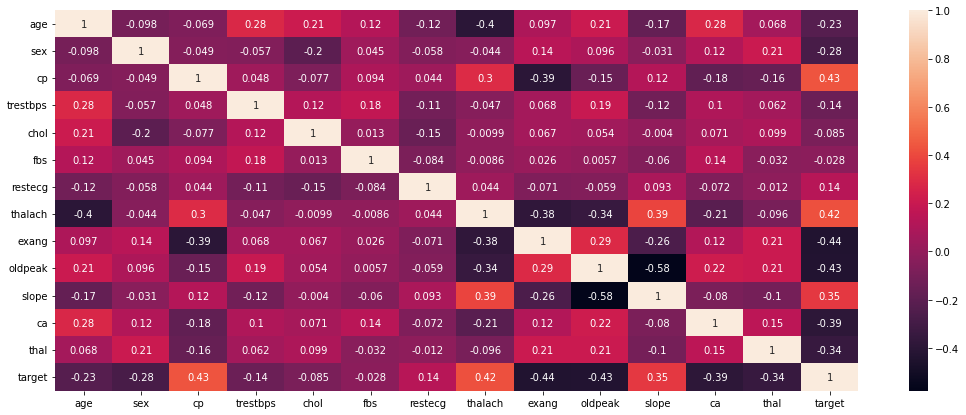

In [130]:
plt.figure(figsize=(18 , 7))
sns.heatmap(df.corr() , annot = True);

In [131]:
df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

<Figure size 1296x504 with 0 Axes>

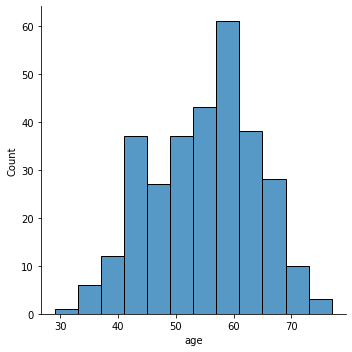

In [132]:
plt.figure(figsize=(18 , 7))
sns.displot(df.age);

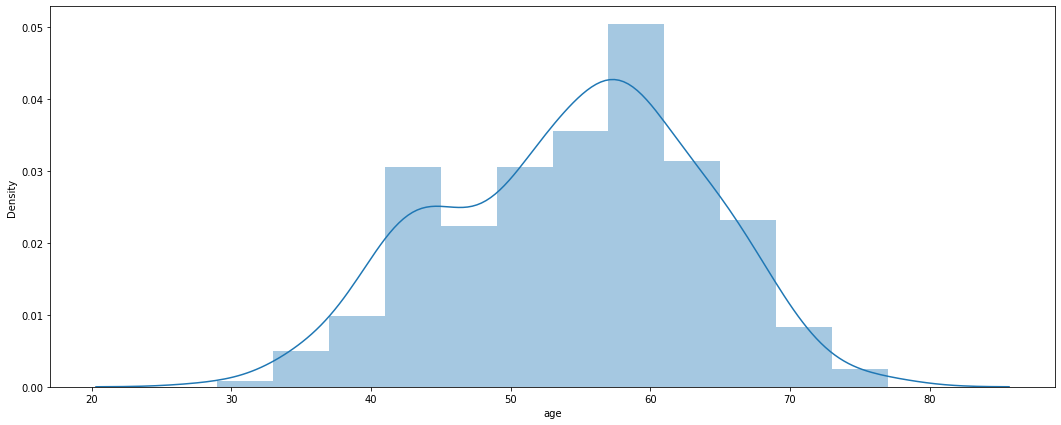

In [133]:
plt.figure(figsize=(18 , 7))
sns.distplot(df.age);

<Figure size 1296x504 with 0 Axes>

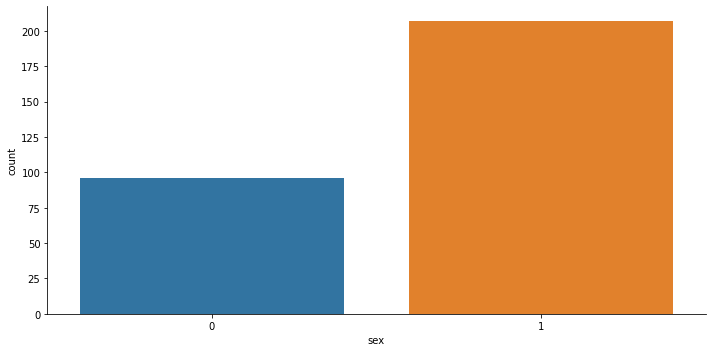

In [134]:
plt.figure(figsize=(18 , 7))
sns.factorplot('sex', data = df, kind = 'count', aspect = 2.0)
# There are significantly more men in the data than women

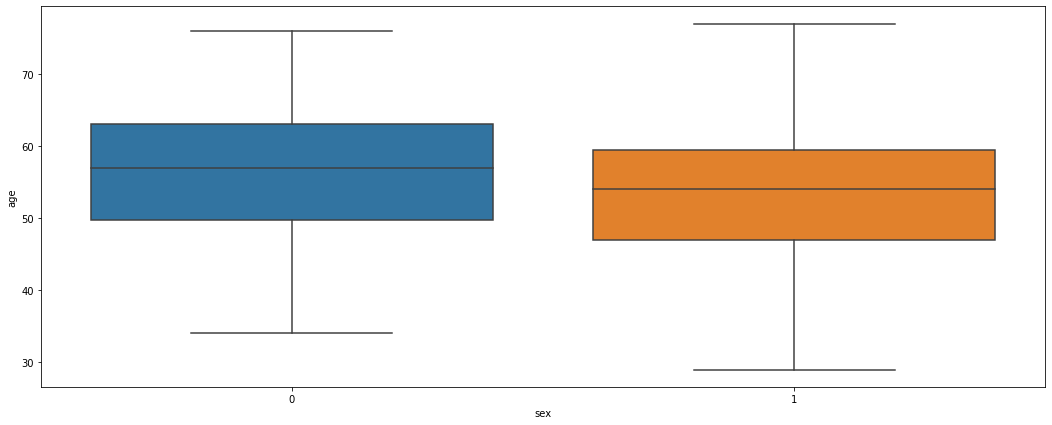

In [135]:
plt.figure(figsize=(18 , 7))
sns.boxplot(data = df, x = 'sex', y = 'age');
# A box plot to show the ranges of ages of the women and men in the data

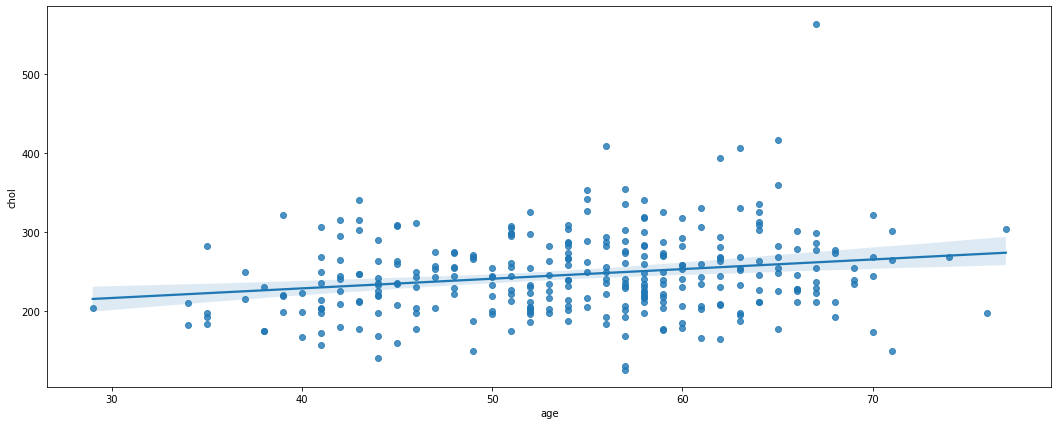

In [136]:
plt.figure(figsize=(18 , 7))
sns.regplot(data = df, x = 'age', y = 'chol');

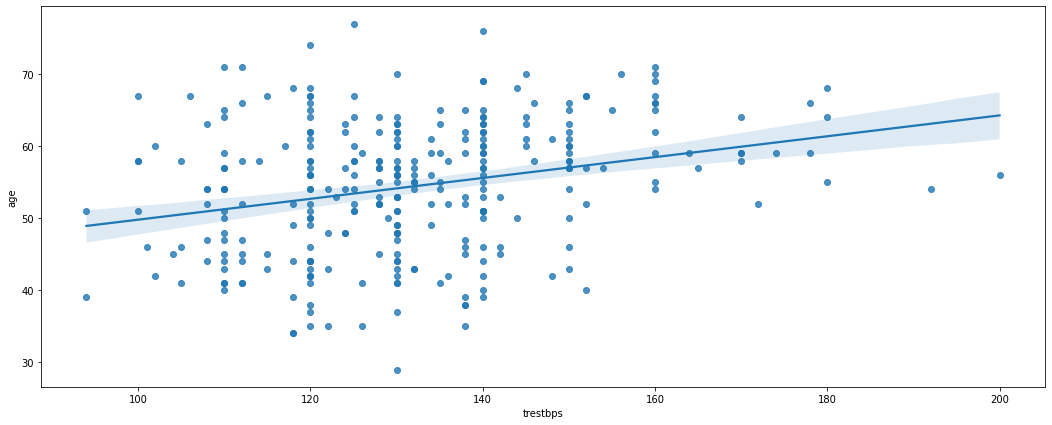

In [137]:
plt.figure(figsize=(18 , 7))
sns.regplot(data = df, x = 'trestbps', y = 'age');

In [138]:
hist_df = df.groupby('target')

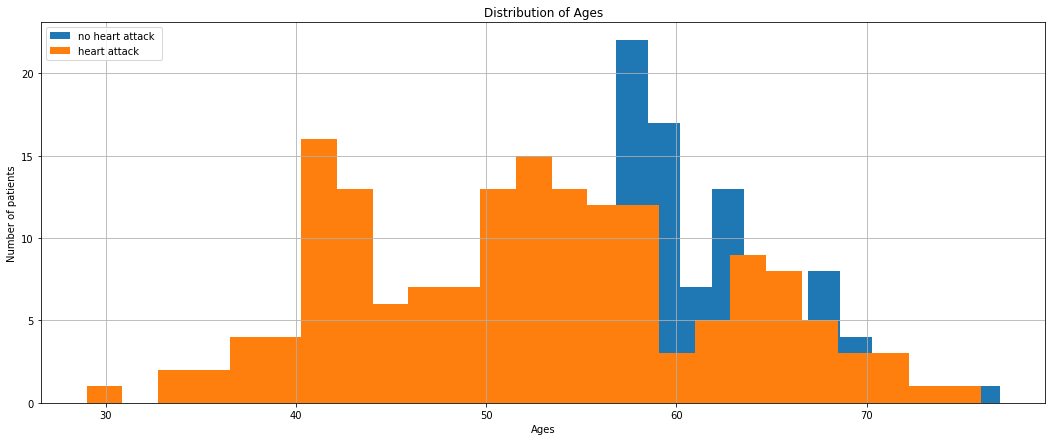

In [139]:
plt.figure(figsize=(18 , 7))
hist_df['age'].hist(bins = 25, label = hist_df['target'])
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()

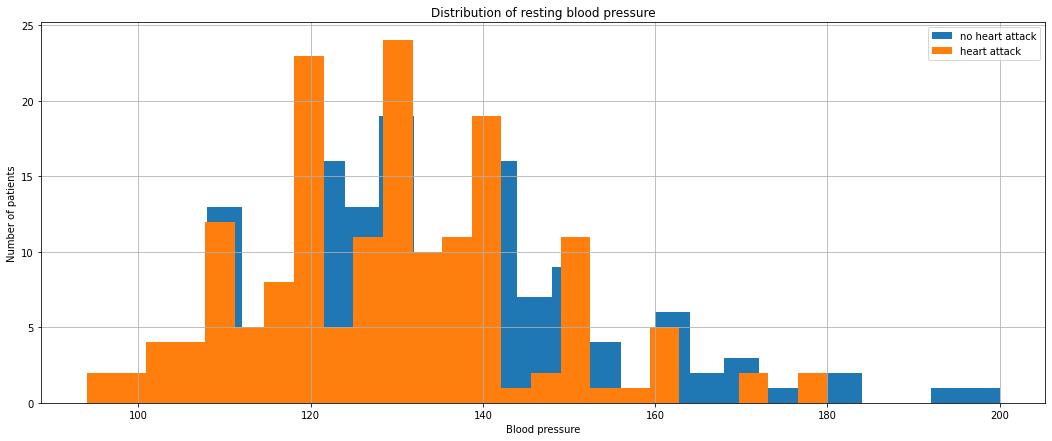

In [140]:
plt.figure(figsize=(18 , 7))
hist_df['trestbps'].hist(bins = 25, label = hist_df['target'])
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

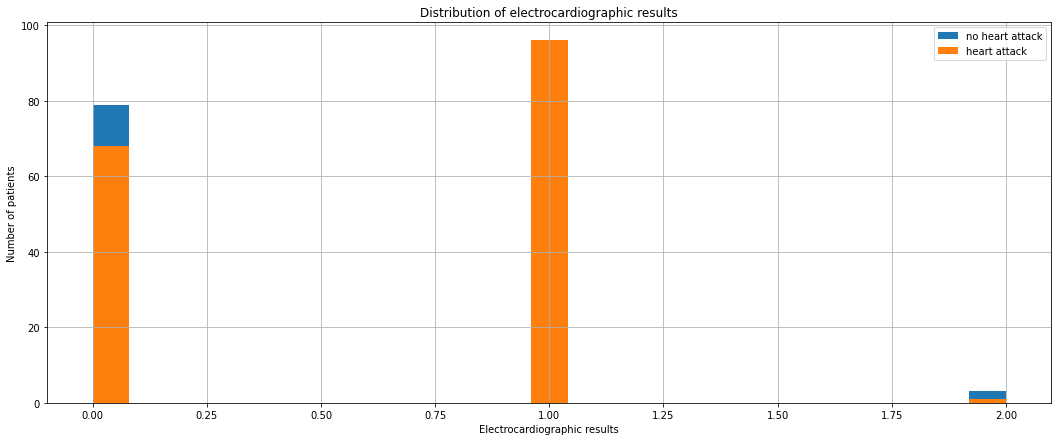

In [141]:
plt.figure(figsize=(18 , 7))
hist_df['restecg'].hist(bins = 25, label = hist_df['target'])
plt.title('Distribution of electrocardiographic results')
plt.xlabel('Electrocardiographic results')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

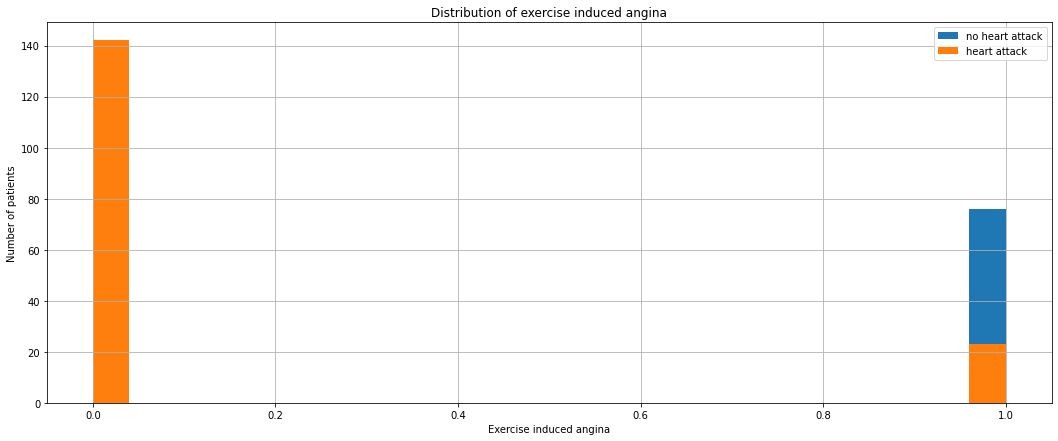

In [142]:
plt.figure(figsize=(18 , 7))
hist_df['exang'].hist(bins = 25, label = hist_df['target'])
plt.title('Distribution of exercise induced angina')
plt.xlabel('Exercise induced angina')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

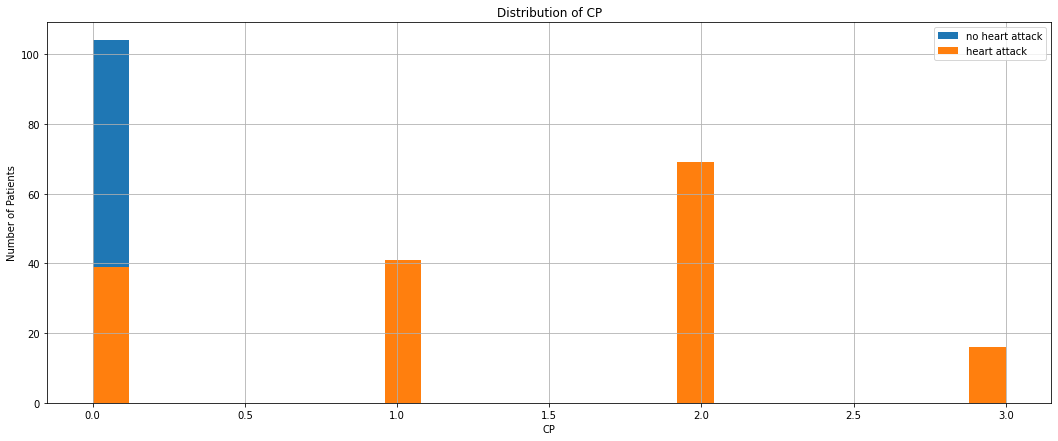

In [143]:
plt.figure(figsize=(18 , 7))
hist_df['cp'].hist(bins = 25)
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.legend(('no heart attack', 'heart attack'))
plt.show()


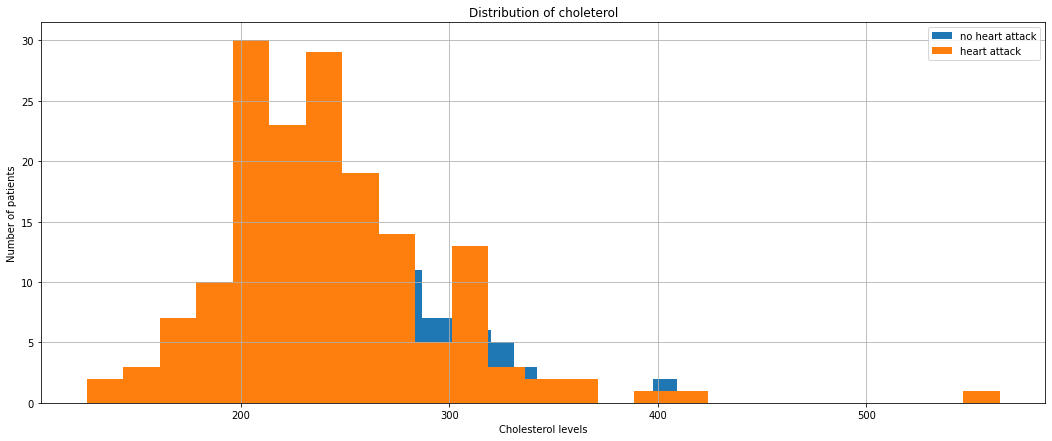

In [144]:
plt.figure(figsize=(18 , 7))
hist_df['chol'].hist(bins = 25, label = hist_df['target'])
plt.title('Distribution of choleterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

In [145]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

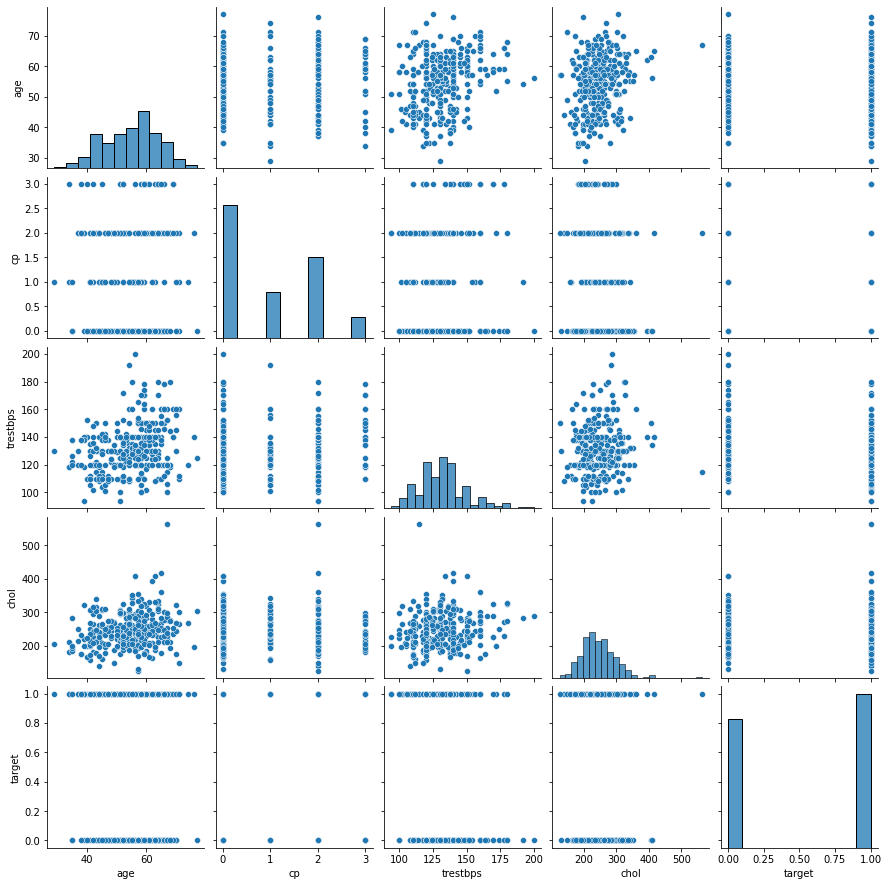

In [146]:
sns.pairplot(df[["age", "cp", "trestbps", 'chol', 'target']]);

**Patients who didn't suffer heart attacks**

In [147]:
patients_no_heart_attack = df[df['target'] == 0]

In [148]:
patients_no_heart_attack.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.15942,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478


**Patients who suffered Heart Attacks**

In [149]:
heart_attack_patients = df[df['target'] == 1]


In [150]:
heart_attack_patients.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
1,52.49697,0.563636,1.375758,129.30303,242.230303,0.139394,0.593939,158.466667,0.139394,0.58303,1.593939,0.363636,2.121212


In [151]:
# Seperating the dataframe into a women individually and men

men = df[df['sex'] == 1]
women = df[df['sex'] == 0]

In [152]:
# Seperating the individual data frames of men and women into with/with-out heart attacks
# to do continued summary statistics

men_without_heart_attacks = men[men['target'] == 0]
men_heart_attacks = men[men['target'] == 1]

women_without_heart_attacks = women[women['target'] == 0]
women_with_heart_attacks = women[women['target'] == 1]

In [153]:
men_heart_attacks.thalach.mean()


161.90322580645162

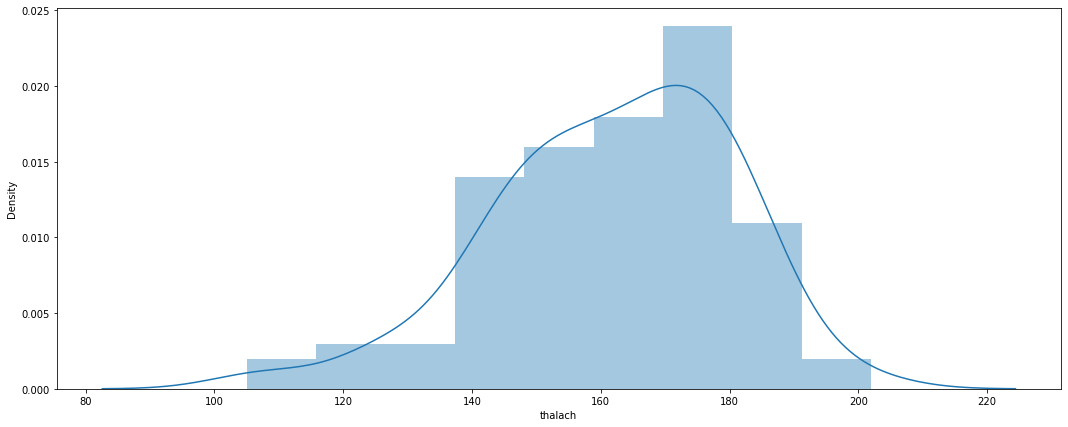

In [154]:
plt.figure(figsize=(18 , 7))
sns.distplot(men_heart_attacks.thalach);

In [155]:
men_without_heart_attacks.thalach.mean()

138.40350877192984

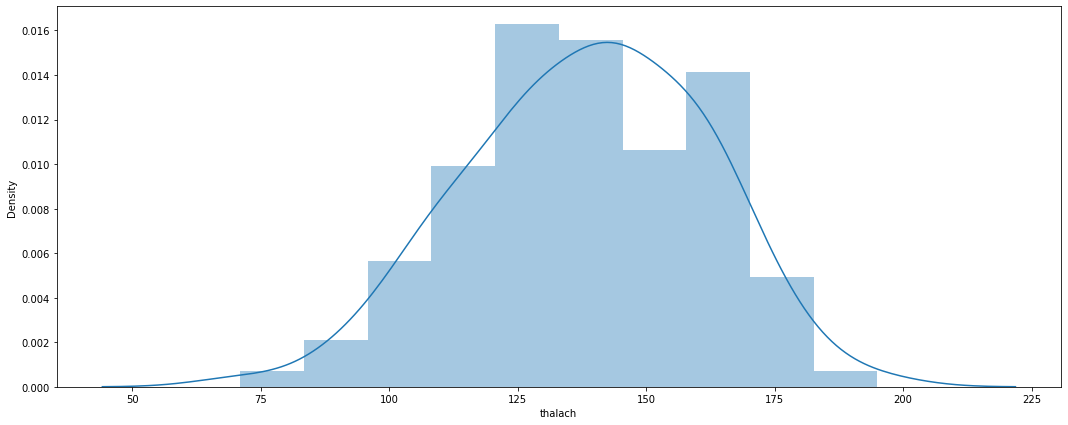

In [156]:
plt.figure(figsize=(18 , 7))
sns.distplot(men_without_heart_attacks.thalach);

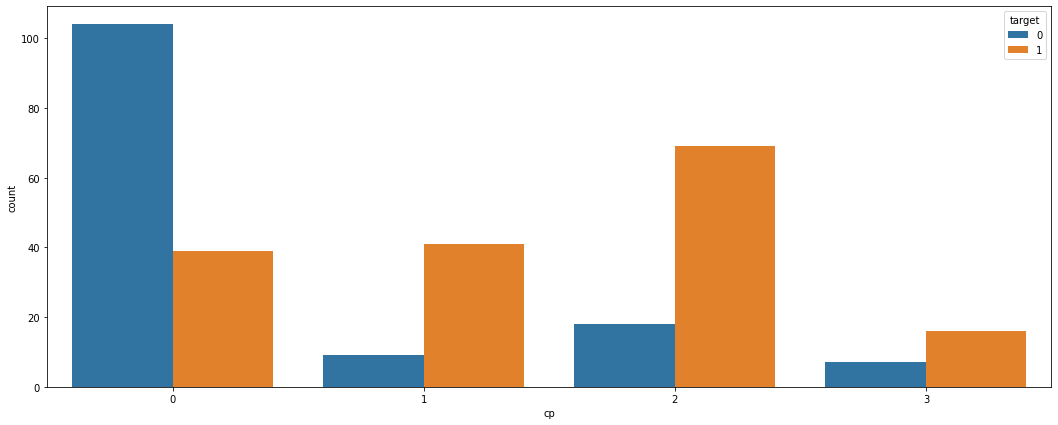

In [157]:
# Viewing the most occurring regions of chest pain for men
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
plt.figure(figsize=(18 , 7))
sns.countplot(x = 'cp', data = df, hue = 'target');

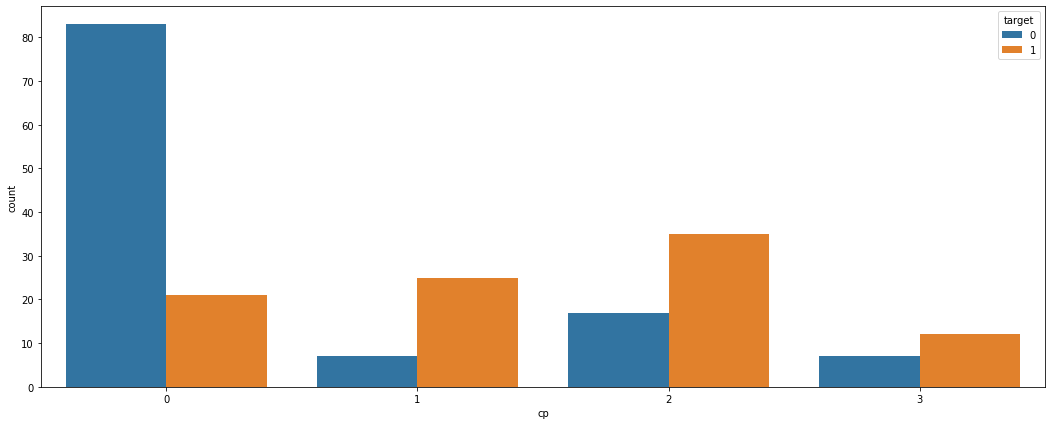

In [158]:
# Viewing the most occurring regions of chest pain for men
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
plt.figure(figsize=(18 , 7))
sns.countplot(x = 'cp', data = men, hue = 'target');

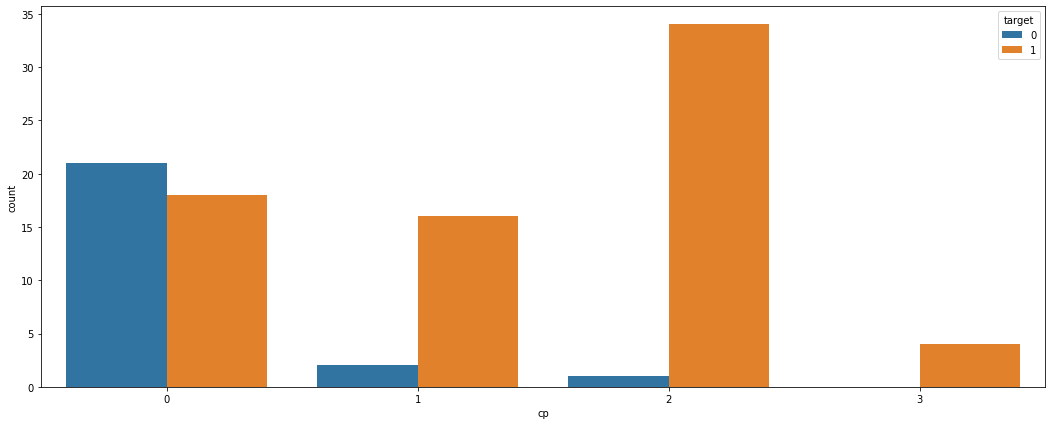

In [159]:
## Viewing the most occurring regions of chest pain for women
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
plt.figure(figsize=(18 , 7))
sns.countplot(x = 'cp', data = women, hue = 'target');

<Figure size 1296x504 with 0 Axes>

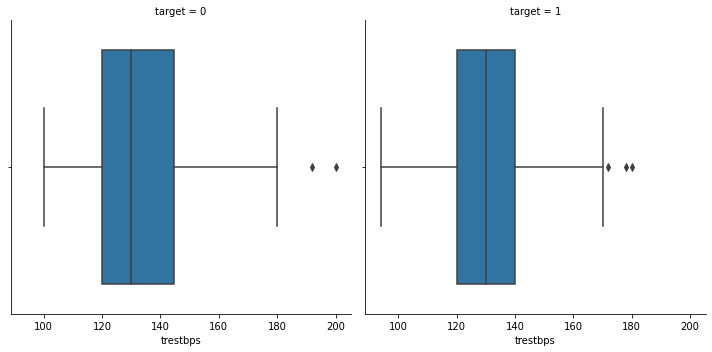

In [160]:
# A boxplot of the resting blood pressure of patients in categories
plt.figure(figsize=(18 , 7))
sns.factorplot(x = 'trestbps', data = df, col = 'target', kind = 'box');

In [161]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


# **Linear Regression**

In [162]:
# Split the dataset

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(data.drop("output", axis=1), data["output"], test_size=0.3)

In [163]:
d1 = df
X = d1.drop('target',axis=1)
y = d1['target']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=5)

print('Xtrain = ' , Xtrain.shape)
print('Xtest = ' , Xtest.shape)
print('ytrain = ' , ytrain.shape)
print('ytest = ' , ytest.shape)

Xtrain =  (212, 13)
Xtest =  (91, 13)
ytrain =  (212,)
ytest =  (91,)


In [164]:
model = LinearRegression()
model

LinearRegression()

In [165]:
model.fit(Xtrain , ytrain)

LinearRegression()

In [166]:
model.coef_

array([ 5.29711834e-05, -2.07623408e-01,  9.21263127e-02, -2.16215922e-03,
       -5.67572908e-04,  4.76161609e-02,  8.65967197e-02,  3.66483511e-03,
       -1.60057897e-01, -4.81895169e-02,  5.57628965e-02, -9.64372788e-02,
       -1.46391082e-01])

In [167]:
model.intercept_

0.8366019372107177

In [168]:
model.score(Xtest , ytest)

0.6010307425922259

In [169]:
R2_train = round(model.score(Xtrain , ytrain) , 3)
R2_train

0.471

In [170]:
R2_test = round(model.score(Xtest , ytest) , 3)
R2_test

0.601

In [171]:
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.601


In [172]:
model_predict = model.predict(Xtest)
model_predict

array([ 0.82094446, -0.14079603, -0.11330761,  0.29548337,  0.67559371,
        0.04206442,  0.58727759, -0.12212443,  0.93788603,  0.57114853,
        0.67626581, -0.17049059,  0.80436303,  1.00630881,  0.30014494,
        0.31230895,  0.39216763,  0.65264205,  0.88272226,  0.35974397,
       -0.22600489,  0.17020518,  1.1530991 , -0.01648258,  0.28919239,
        0.74213949,  0.6457356 ,  1.01593506,  1.15729174,  0.04717495,
        0.97779244,  0.79548015,  0.53461503,  0.67529608,  0.22118367,
       -0.07367158,  0.81333662,  0.78424883,  0.3024066 ,  0.59409256,
        0.65805603,  0.11557926,  0.62947913, -0.15240687,  0.15332243,
        0.03952405, -0.19227871,  0.08489678,  0.1219033 , -0.20614906,
       -0.06099911,  0.66668903,  0.80760808,  0.64905657,  1.16968953,
        0.59127567,  0.70202998,  0.54381022,  0.57506056,  0.88727774,
        0.41004701,  0.30578798,  0.21792926,  0.60639942,  0.56271819,
        0.99134846, -0.19218093,  0.89263236,  0.86747274,  0.08

# **Logistic Regression**


In [173]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=90)
log_reg

LogisticRegression(max_iter=90)

In [174]:
log_reg.fit(Xtrain, ytrain)
log_reg.score(Xtest, ytest)

0.9340659340659341

In [175]:
log_reg_preds = log_reg.predict(Xtest)
log_reg_preds

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1])

In [176]:
# Evaluate the prediced labels with the original labels

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(ytest, log_reg_preds))

[[39  4]
 [ 2 46]]


Text(0.5, 1.0, 'Confusion Matrix')

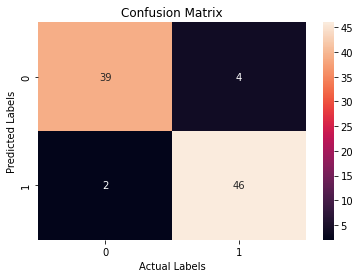

In [177]:
sns.heatmap(confusion_matrix(ytest, log_reg_preds), annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

# **Random Forest Classifier**

In [178]:
# We have our data ready. Let's train the model

from sklearn.ensemble import RandomForestClassifier

In [179]:
forest = RandomForestClassifier()
forest

RandomForestClassifier()

In [180]:
forest.fit(Xtrain, ytrain)
forest.score(Xtest, ytest)

0.8901098901098901

In [181]:
forest_preds = forest.predict(Xtest)
forest_preds

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0])

In [182]:
# Evaluate the prediced labels with the original labels

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(ytest, forest_preds))

[[37  6]
 [ 4 44]]


Text(0.5, 1.0, 'Confusion Matrix')

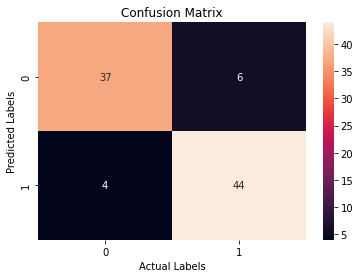

In [183]:
sns.heatmap(confusion_matrix(ytest, forest_preds), annot=True)

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [184]:
print(classification_report(ytest, forest_preds))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.88      0.92      0.90        48

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



# **Decision Tree Classifier**

In [185]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [186]:
dtree.fit(Xtrain, ytrain)
dtree.score(Xtest, ytest)

0.7802197802197802

In [187]:
dtree_preds = dtree.predict(Xtest)
dtree_preds

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1])

In [188]:
# Evaluate the prediced labels with the original labels
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(ytest, dtree_preds))

[[36  7]
 [13 35]]


Text(0.5, 1.0, 'Confusion Matrix')

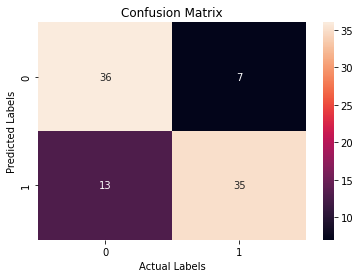

In [189]:
sns.heatmap(confusion_matrix(ytest, dtree_preds), annot=True)

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [190]:
print(classification_report(ytest, dtree_preds))
# Decsion Tree Classifier is predicting the labels at the worst rate as compared to other two models. 
# I think we can use the StandardScaler method to scale the data and retrain the model. May be it predicts good 🤔

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        43
           1       0.83      0.73      0.78        48

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



# **Standard Scaler**

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [192]:
X_scaler_train = scaler.fit_transform(Xtrain)
X_scaler_test = scaler.fit_transform(Xtest)

# Now, fit the scaled data to the DecsionTreeClassifier

dtree.fit(X_scaler_train, ytrain)
dtree.score(X_scaler_test, ytest)

# Infact, we have the slight decrement by using the standardscaler for this data

0.8241758241758241

In [193]:
scaler_preds = dtree.predict(X_scaler_test)
scaler_preds

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1])

In [194]:
print(confusion_matrix(ytest, dtree_preds))

[[36  7]
 [13 35]]


Text(0.5, 1.0, 'Confusion Matrix')

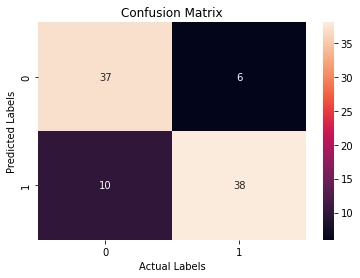

In [195]:
sns.heatmap(confusion_matrix(ytest, scaler_preds), annot=True)

plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [196]:
print(classification_report(ytest, scaler_preds))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        43
           1       0.86      0.79      0.83        48

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



# **Comparision of score of all models**

In [197]:
model_scores = { "Linear Regression" : model.score(Xtest , ytest) ,
               "Logistic Regression" : log_reg.score(Xtest, ytest) , 
               "Random Forest Classifier" : forest.score(Xtest, ytest),
                "Decision Tree Classifier" : dtree.score(Xtest, ytest),                              
                "StandardScaler" : dtree.score(X_scaler_test, ytest)}

In [198]:
model_scores

{'Linear Regression': 0.6010307425922259,
 'Logistic Regression': 0.9340659340659341,
 'Random Forest Classifier': 0.8901098901098901,
 'Decision Tree Classifier': 0.5164835164835165,
 'StandardScaler': 0.8241758241758241}

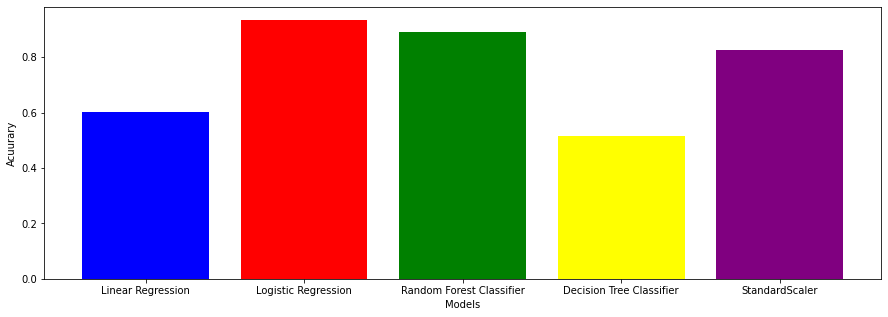

In [199]:
plt.figure(figsize=(15, 5))
plt.bar(*zip(*model_scores.items()), color=["blue", "red", "green", "yellow", "purple" ])
plt.xlabel("Models");
plt.ylabel("Acuurary");